In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# valid intervals - 1min, 3min, 5min, 15min, 30min, 1H, 2H, 4H, 6H, 8H, 12H, 1D, 3D, 1W, 1M
interval = '1H'
# USDT base
#pairs = ['BTCUSDT', 'ETHUSDT','ADAUSDT','CHZUSDT','ENJUSDT','LINKUSDT','FILUSDT','XRPUSDT', 'DOTUSDT','SOLBTC']
# BTC base
pairs = ['ADABTC','ENJBTC','SOLBTC', 'BNBBTC']
#pairs = ['ETHBTC','ADABTC','CHZBTC','ENJBTC','LINKBTC','FILBTC','XRPBTC', 'DOTBTC','SOLBTC', 'BNBBTC']
#recomendations from Fausto Botelho in 29/07/2021 (https://www.youtube.com/channel/UCFzEG7N47dktszRxdfOHJdA)
#pairs = ['BATBTC', 'BNBBTC', 'CHZBTC', 'ETHBTC', 'KNCBTC', 'MATICBTC', 'XEMBTC', 'ONTBTC', 
#    'CAKEBTC', 'RENBTC', 'XRPBTC', 'SOLBTC', 'STEEMBTC', 'SUSHIBTC', 'TRXBTC', 'UNIBTC']
#pairs = ['EGLDBTC', 'FETBTC', 'SKLBTC', 'KAVABTC', 'SXPBTC']

# date to start/end analysis
dt_start_analysis = '2021-1-1'
# Use '' for analysis until now
dt_end_analysis = ''

In [78]:
def normalize_data(df):
    return df/df.iloc[0,:]

In [79]:
from binance_utils import init
from trade_utils import get_data

client = init()

crypto_pairs_dict = {}
crypto_df = pd.DataFrame()

for pair in pairs:
    df = get_data(client, pair, interval)

    if dt_end_analysis == '' and dt_start_analysis != '':
        df = df[dt_start_analysis:]
    elif dt_end_analysis != '' and dt_start_analysis == '':
        df = df[:dt_end_analysis]
    elif dt_end_analysis != '' and dt_start_analysis != '':
        df = df[dt_start_analysis:dt_end_analysis]

    crypto_pairs_dict[pair] = df.copy()

    if crypto_df.empty:
        crypto_df = df[['ClosePrice']].copy()
        crypto_df = crypto_df.rename(columns={'ClosePrice' : pair})
    else: 
        crypto_df = crypto_df.join(df[['ClosePrice']].copy())
        crypto_df = crypto_df.rename(columns={'ClosePrice' : pair})


In [80]:
crypto_df.head()

,ADABTC,ENJBTC,SOLBTC,BNBBTC
OpenTime,,,,
2021-01-01 00:00:00,0.000006,0.000005,0.000053,0.001289
2021-01-01 01:00:00,0.000006,0.000005,0.000053,0.001278
2021-01-01 02:00:00,0.000006,0.000005,0.000054,0.001300
2021-01-01 03:00:00,0.000006,0.000005,0.000055,0.001295
2021-01-01 04:00:00,0.000006,0.000005,0.000055,0.001296


In [81]:
# Example
pair = pairs[0]

crypto_pairs_dict[pair].tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
OpenTime,,,,,
2021-10-15 10:00:00,0.000036,0.000036,0.000036,0.000036,1710694.3
2021-10-15 11:00:00,0.000036,0.000036,0.000036,0.000036,1508010.9
2021-10-15 12:00:00,0.000036,0.000036,0.000036,0.000036,1255280.4
2021-10-15 13:00:00,0.000036,0.000036,0.000036,0.000036,1814656.8
2021-10-15 14:00:00,0.000036,0.000036,0.000036,0.000036,1964466.3


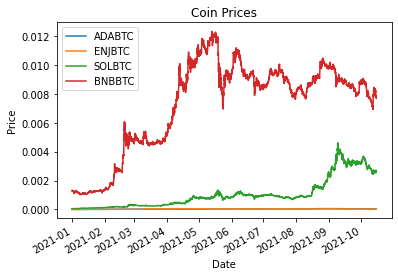

In [82]:
ax = crypto_df.plot(title='Coin Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

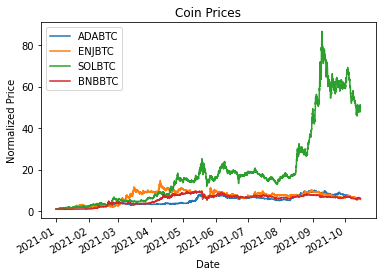

In [83]:
ax = normalize_data(crypto_df).plot(title='Coin Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price')
plt.show()

In [84]:
daily_returns = pd.DataFrame()

for pair in pairs:
    daily_returns_pair = pd.DataFrame(crypto_pairs_dict[pair]['ClosePrice'].resample('1d').ffill().pct_change())
    daily_returns_pair = daily_returns_pair.rename(columns={'ClosePrice' : pair})

    if daily_returns.empty:
        daily_returns = daily_returns_pair.copy()
    else:
        daily_returns = daily_returns.join(daily_returns_pair)

daily_returns.head()

,ADABTC,ENJBTC,SOLBTC,BNBBTC
OpenTime,,,,
2021-01-01,NaN,NaN,NaN,NaN
2021-01-02,-0.053055,-0.006550,0.144334,-0.017533
2021-01-03,-0.076401,-0.107692,-0.083922,-0.075332
2021-01-04,0.202206,0.039409,0.212442,0.083604
2021-01-05,0.053517,0.026066,0.103209,-0.011270


In [85]:
monthly_returns = pd.DataFrame()

for pair in pairs:
    monthly_returns_pair = pd.DataFrame(crypto_pairs_dict[pair]['ClosePrice'].resample('M').ffill().pct_change())
    monthly_returns_pair = monthly_returns_pair.rename(columns={'ClosePrice' : pair})

    if monthly_returns.empty:
        monthly_returns = monthly_returns_pair.copy()
    else:
        monthly_returns = monthly_returns.join(monthly_returns_pair)

monthly_returns.head()

,ADABTC,ENJBTC,SOLBTC,BNBBTC
OpenTime,,,,
2021-01-31,NaN,NaN,NaN,NaN
2021-02-28,1.615809,0.235234,1.289269,2.647693
2021-03-31,-0.278285,2.560594,0.131653,0.100300
2021-04-30,0.178189,0.122251,1.431205,1.057512
2021-05-31,0.834711,-0.129152,0.023830,-0.174950


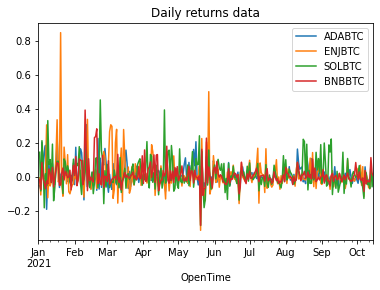

In [86]:
daily_returns.plot(title='Daily returns data')
plt.show()

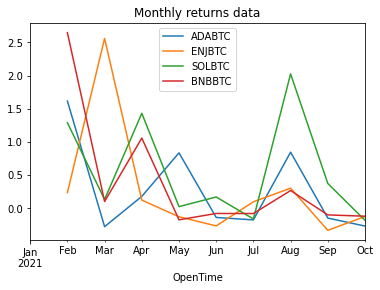

In [87]:
monthly_returns.plot(title='Monthly returns data')
plt.show()

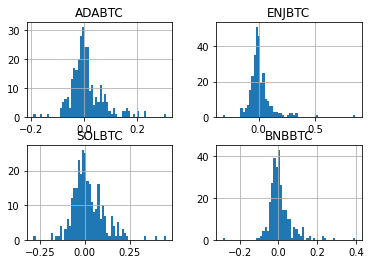

In [88]:
daily_returns.hist(bins = 60)
plt.show()

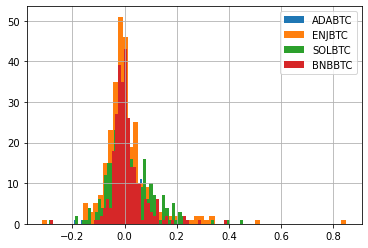

In [89]:
# compute daily returns in the same plot
for pair in pairs:
    daily_returns[pair].hist(bins=60, label=pair)

plt.legend(loc='upper right')
plt.show()

In [90]:
cum_returns = (daily_returns + 1).cumprod()

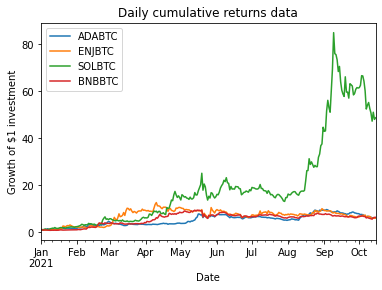

In [91]:
ax1 = (daily_returns + 1).cumprod().plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Daily cumulative returns data")
plt.show()

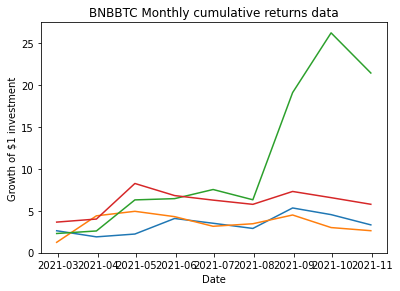

In [92]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
cum_returns = (monthly_returns + 1).cumprod()
ax1.plot(cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title(pair + " Monthly cumulative returns data")
plt.show()

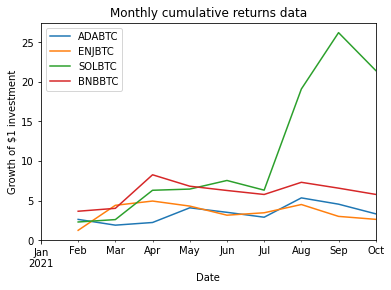

In [93]:
ax1 = (monthly_returns + 1).cumprod().plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Monthly cumulative returns data")
plt.show()

In [94]:
print(monthly_returns.mean())

ADABTC    0.273481
ENJBTC    0.273536
SOLBTC    0.566509
BNBBTC    0.390612
dtype: float64


In [95]:
print(monthly_returns.std())

ADABTC    0.671133
ENJBTC    0.885251
SOLBTC    0.803962
BNBBTC    0.929019
dtype: float64


In [96]:
print(monthly_returns.corr())

          ADABTC    ENJBTC    SOLBTC    BNBBTC
ADABTC  1.000000 -0.154149  0.611127  0.727601
ENJBTC -0.154149  1.000000 -0.023286  0.032335
SOLBTC  0.611127 -0.023286  1.000000  0.580444
BNBBTC  0.727601  0.032335  0.580444  1.000000


In [97]:
print(monthly_returns.cov())

          ADABTC    ENJBTC    SOLBTC    BNBBTC
ADABTC  0.450420 -0.091583  0.329743  0.453656
ENJBTC -0.091583  0.783670 -0.016573  0.026593
SOLBTC  0.329743 -0.016573  0.646356  0.433532
BNBBTC  0.453656  0.026593  0.433532  0.863077
